In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.__version__

'0.12.2'

### 一、数据读写

In [2]:
train_data = pd.read_csv('./data/DataAnalysisSample.csv')

In [3]:
train_data.shape

(500, 41)

### 二、数据预览

2.1 查看数据表

In [4]:
train_data.shape

(500, 41)

In [5]:
train_data.dtypes

Id                               int64
Address                         object
Sold Price                     float64
Summary                         object
Type                            object
Year built                     float64
Heating                         object
Cooling                         object
Parking                         object
Lot                            float64
Bedrooms                        object
Bathrooms                      float64
Full bathrooms                 float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance     float64
Middle School                   object
Middle School Score            float64
Middle School Distance         float64
High School                     object
High School Score              float64
High School Distance     

In [6]:
train_data.columns

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance', 'Flooring',
       'Heating features', 'Cooling features', 'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           500 non-null    int64  
 1   Address                      500 non-null    object 
 2   Sold Price                   500 non-null    float64
 3   Summary                      499 non-null    object 
 4   Type                         500 non-null    object 
 5   Year built                   493 non-null    float64
 6   Heating                      440 non-null    object 
 7   Cooling                      294 non-null    object 
 8   Parking                      484 non-null    object 
 9   Lot                          361 non-null    float64
 10  Bedrooms                     472 non-null    object 
 11  Bathrooms                    461 non-null    float64
 12  Full bathrooms               420 non-null    float64
 13  Total interior livab

2.2 预览数据

In [8]:
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,10391,327 Castile Way,1715000.0,Stunningly Beautiful Inside & Out perfectly de...,SingleFamily,1999.0,Forced Air,No Air Conditioning,Attached,5662.8,...,Attached,1611000.0,17878.0,2020-04-05,1680000.0,2005-12-20,1375000.0,South San Francisco,94080,CA
1,38445,336 Market St,1856500.0,"Rare corner-lot, 2-story Single Family at Sant...",SingleFamily,2017.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",2692.0,...,"Garage, Garage - Attached, Covered",1849827.0,22949.0,2020-10-20,1799000.0,2017-10-20,1778000.0,Los Gatos,95032,CA
2,27058,1439 Bouret Dr,1100000.0,You must see this lovingly renovated home on a...,SingleFamily,1963.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",6599.0,...,"Garage, Garage - Attached, Covered",134573.0,2804.0,2020-08-28,1039900.0,NaN,NaN,San Jose,95118,CA
3,21222,1836 Circulo Canada UNIT 12,150000.0,Beautiful property located nestled in between ...,SingleFamily,2007.0,Heat Pump,Central,"Garage, Garage - Attached, Covered",11325.6,...,"Garage, Garage - Attached, Covered",84112.0,896.0,2020-07-01,150000.0,2012-02-24,80000.0,Rio Rico,85648,AZ
4,24578,887 College Dr,1182000.0,"887 College Dr, San Jose, CA 95128 is a single...",SingleFamily,1955.0,Central Forced Air,"Ceiling Fan, Central AC","Garage, Garage - Attached, Covered",6080.0,...,"Garage, Garage - Attached, Covered",731883.0,10210.0,2020-07-20,1188888.0,2013-03-05,650000.0,Santa Clara,95053,CA


In [9]:
train_data.tail()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
495,20271,6100 Gassner Rd,1048000.0,"6100 Gassner Rd, Valley Springs, CA 95252 is a...",SingleFamily,1977.0,"Propane, Central, Fireplace Insert, Pellet Stove","Central Air, Multi Units, Whole House Fan","Carport, Garage - Attached, Covered",2613600.0,...,"Carport, Garage - Attached, Covered",411744.0,4605.0,2019-05-06,1600000.0,NaN,NaN,Burson,95225,CA
496,1678,3210 Napa Ct,1000000.0,"3210 Napa Ct, San Jose, CA 95148 is a single f...",SingleFamily,1971.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",6255.0,...,"Garage, Garage - Attached, Covered",601910.0,9492.0,2019-11-15,950000.0,2003-09-25,463000.0,San Jose,95148,CA
497,9214,1151 Doralee Way,101000.0,"1151 Doralee Way, San Jose, CA 95125 is a sing...",SingleFamily,1954.0,Other,NaN,"Garage, Garage - Attached, Covered",10030.0,...,"Garage, Garage - Attached, Covered",1417956.0,17819.0,2014-11-19,1049000.0,2015-03-26,249000.0,San Jose,95125,CA
498,13818,104 Lloyd Ct,649999.0,This property can be viewed in person. Welcom...,Townhouse,1983.0,"Fireplace, Central Forced Air, Central Forced ...",NaN,0 spaces,871.0,...,NaN,611665.0,7482.0,2020-04-28,649999.0,2005-02-02,489500.0,Aptos,95003,CA
499,30193,267 Arch St,1139000.0,"Nestled near the top of Ingleside Heights, the...",SingleFamily,1947.0,"Central, Gas",NaN,"Garage Door Opener, Interior Access, Tandem, O...",2495.0,...,"Garage Door Opener, Interior Access, Tandem, O...",903828.0,11488.0,2020-08-19,1150000.0,2016-06-16,835000.0,San Francisco,94132,CA


In [10]:
pd.concat((train_data.head(), train_data.tail()))

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,10391,327 Castile Way,1715000.0,Stunningly Beautiful Inside & Out perfectly de...,SingleFamily,1999.0,Forced Air,No Air Conditioning,Attached,5662.8,...,Attached,1611000.0,17878.0,2020-04-05,1680000.0,2005-12-20,1375000.0,South San Francisco,94080,CA
1,38445,336 Market St,1856500.0,"Rare corner-lot, 2-story Single Family at Sant...",SingleFamily,2017.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",2692.0,...,"Garage, Garage - Attached, Covered",1849827.0,22949.0,2020-10-20,1799000.0,2017-10-20,1778000.0,Los Gatos,95032,CA
2,27058,1439 Bouret Dr,1100000.0,You must see this lovingly renovated home on a...,SingleFamily,1963.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",6599.0,...,"Garage, Garage - Attached, Covered",134573.0,2804.0,2020-08-28,1039900.0,NaN,NaN,San Jose,95118,CA
3,21222,1836 Circulo Canada UNIT 12,150000.0,Beautiful property located nestled in between ...,SingleFamily,2007.0,Heat Pump,Central,"Garage, Garage - Attached, Covered",11325.6,...,"Garage, Garage - Attached, Covered",84112.0,896.0,2020-07-01,150000.0,2012-02-24,80000.0,Rio Rico,85648,AZ
4,24578,887 College Dr,1182000.0,"887 College Dr, San Jose, CA 95128 is a single...",SingleFamily,1955.0,Central Forced Air,"Ceiling Fan, Central AC","Garage, Garage - Attached, Covered",6080.0,...,"Garage, Garage - Attached, Covered",731883.0,10210.0,2020-07-20,1188888.0,2013-03-05,650000.0,Santa Clara,95053,CA
495,20271,6100 Gassner Rd,1048000.0,"6100 Gassner Rd, Valley Springs, CA 95252 is a...",SingleFamily,1977.0,"Propane, Central, Fireplace Insert, Pellet Stove","Central Air, Multi Units, Whole House Fan","Carport, Garage - Attached, Covered",2613600.0,...,"Carport, Garage - Attached, Covered",411744.0,4605.0,2019-05-06,1600000.0,NaN,NaN,Burson,95225,CA
496,1678,3210 Napa Ct,1000000.0,"3210 Napa Ct, San Jose, CA 95148 is a single f...",SingleFamily,1971.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",6255.0,...,"Garage, Garage - Attached, Covered",601910.0,9492.0,2019-11-15,950000.0,2003-09-25,463000.0,San Jose,95148,CA
497,9214,1151 Doralee Way,101000.0,"1151 Doralee Way, San Jose, CA 95125 is a sing...",SingleFamily,1954.0,Other,NaN,"Garage, Garage - Attached, Covered",10030.0,...,"Garage, Garage - Attached, Covered",1417956.0,17819.0,2014-11-19,1049000.0,2015-03-26,249000.0,San Jose,95125,CA
498,13818,104 Lloyd Ct,649999.0,This property can be viewed in person. Welcom...,Townhouse,1983.0,"Fireplace, Central Forced Air, Central Forced ...",NaN,0 spaces,871.0,...,NaN,611665.0,7482.0,2020-04-28,649999.0,2005-02-02,489500.0,Aptos,95003,CA
499,30193,267 Arch St,1139000.0,"Nestled near the top of Ingleside Heights, the...",SingleFamily,1947.0,"Central, Gas",NaN,"Garage Door Opener, Interior Access, Tandem, O...",2495.0,...,"Garage Door Opener, Interior Access, Tandem, O...",903828.0,11488.0,2020-08-19,1150000.0,2016-06-16,835000.0,San Francisco,94132,CA


2.3 描述统计

In [11]:
train_data.describe()

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,500.000000,5.000000e+02,493.000000,3.610000e+02,461.000000,420.000000,480.000000,491.000000,491.000000,453.000000,454.000000,330.000000,330.000000,447.000000,451.000000,4.560000e+02,448.000000,5.000000e+02,3.280000e+02,500.000000
mean,23221.352000,1.264959e+06,1957.162272,4.127513e+04,2.301518,2.004762,1785.193750,1.346232,1.313646,5.653422,1.151322,5.345455,1.682727,6.230425,2.541685,7.813704e+05,9868.491071,1.271955e+06,8.424580e+05,93363.000000
std,13235.621632,1.149382e+06,128.490051,2.152271e+05,1.080548,0.890135,1065.142686,1.492252,1.443987,2.077368,1.821974,1.997429,2.063337,1.965662,3.549365,8.732021e+05,10335.999356,1.226265e+06,9.239037e+05,2258.315367
min,156.000000,1.010000e+05,0.000000,1.800000e-01,0.000000,1.000000,389.000000,0.000000,0.000000,1.000000,0.100000,1.000000,0.100000,1.000000,0.100000,2.280000e+04,98.000000,1.199000e+05,1.350000e+04,85621.000000
25%,12110.750000,6.237500e+05,1947.000000,5.020000e+03,2.000000,2.000000,1209.750000,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.871198e+05,4067.500000,6.194250e+05,3.470000e+05,90230.000000
50%,22569.500000,1.012500e+06,1965.000000,6.583000e+03,2.000000,2.000000,1547.000000,1.000000,1.000000,6.000000,0.500000,6.000000,1.000000,7.000000,1.500000,5.946095e+05,7561.000000,9.990000e+05,6.200000e+05,94118.000000
75%,34746.500000,1.530250e+06,1986.000000,1.042800e+04,3.000000,2.000000,2066.250000,2.000000,2.000000,7.000000,1.100000,7.000000,1.775000,8.000000,2.600000,9.231098e+05,11971.250000,1.499000e+06,9.850000e+05,95070.000000
max,47302.000000,1.200000e+07,2020.000000,2.613600e+06,9.000000,8.000000,15866.000000,11.000000,11.000000,10.000000,12.400000,9.000000,16.400000,10.000000,33.700000,8.296987e+06,100334.000000,1.490000e+07,7.550000e+06,96155.000000


In [12]:
train_data['Sold Price' ].describe()

count    5.000000e+02
mean     1.264959e+06
std      1.149382e+06
min      1.010000e+05
25%      6.237500e+05
50%      1.012500e+06
75%      1.530250e+06
max      1.200000e+07
Name: Sold Price, dtype: float64

### 三、数据清洗

3.1 查看各列缺失值

In [13]:
train_data.isnull().sum()

Id                               0
Address                          0
Sold Price                       0
Summary                          1
Type                             0
Year built                       7
Heating                         60
Cooling                        206
Parking                         16
Lot                            139
Bedrooms                        28
Bathrooms                       39
Full bathrooms                  80
Total interior livable area     20
Total spaces                     9
Garage spaces                    9
Region                           0
Elementary School               46
Elementary School Score         47
Elementary School Distance      46
Middle School                  170
Middle School Score            170
Middle School Distance         170
High School                     49
High School Score               53
High School Distance            49
Flooring                       122
Heating features                68
Cooling features    

计算缺失率

In [14]:
train_data.describe().T.assign(missing_pct=train_data.apply(lambda x :(len(x)-x.count())/len(x)))

,count,mean,std,min,25%,50%,75%,max,missing_pct
Id,500.0,2.322135e+04,1.323562e+04,156.00,12110.75,22569.5,34746.500,47302.0,0.000
Sold Price,500.0,1.264959e+06,1.149382e+06,101000.00,623750.00,1012500.0,1530250.000,12000000.0,0.000
Year built,493.0,1.957162e+03,1.284901e+02,0.00,1947.00,1965.0,1986.000,2020.0,0.014
Lot,361.0,4.127513e+04,2.152271e+05,0.18,5020.00,6583.0,10428.000,2613600.0,0.278
Bathrooms,461.0,2.301518e+00,1.080548e+00,0.00,2.00,2.0,3.000,9.0,0.078
Full bathrooms,420.0,2.004762e+00,8.901348e-01,1.00,2.00,2.0,2.000,8.0,0.160
Total interior livable area,480.0,1.785194e+03,1.065143e+03,389.00,1209.75,1547.0,2066.250,15866.0,0.040
Total spaces,491.0,1.346232e+00,1.492252e+00,0.00,0.00,1.0,2.000,11.0,0.018
Garage spaces,491.0,1.313646e+00,1.443987e+00,0.00,0.00,1.0,2.000,11.0,0.018
Elementary School Score,453.0,5.653422e+00,2.077368e+00,1.00,4.00,6.0,7.000,10.0,0.094


缺失值可视化：

<Axes: >

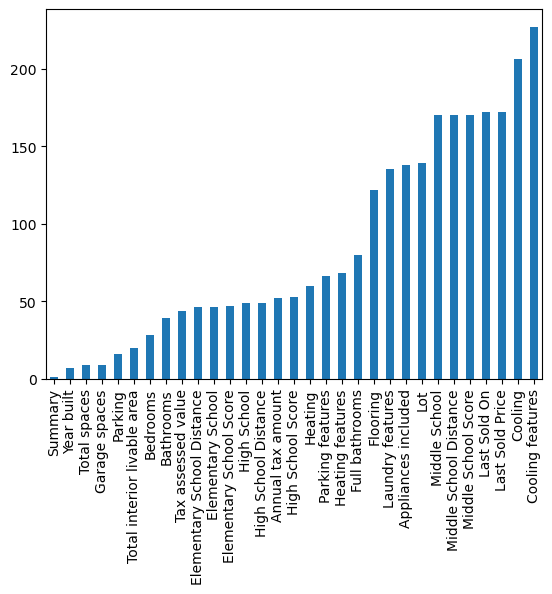

In [15]:
missing = train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

缺失值分布可视化：

<Axes: >

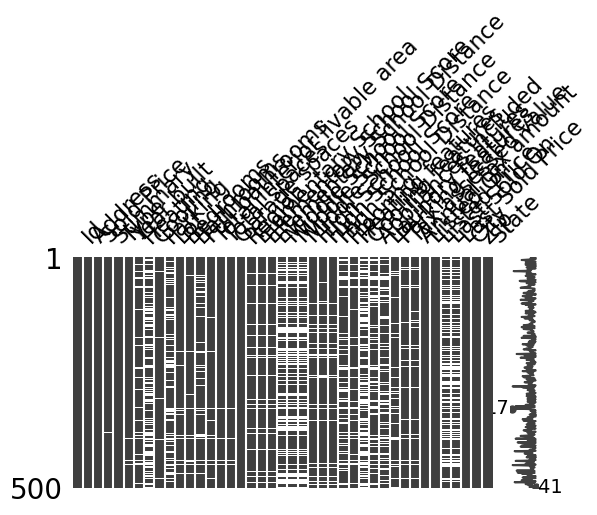

In [16]:
msno.matrix(train_data, figsize=(6,3))

缺失值分布可视化：

<Axes: >

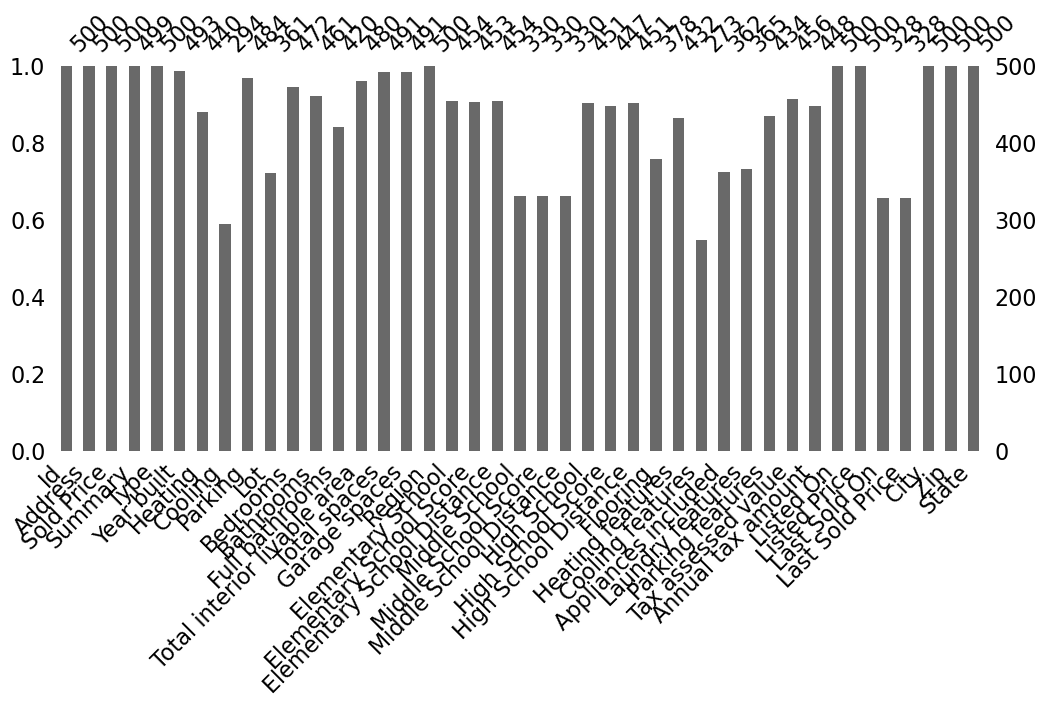

In [17]:
msno.bar(train_data,figsize=(12,5))

2.2 异常值处理

2.3 对缺失值处理

指定值替换：

In [18]:
train_data['Sold Price'].replace('-', np.nan, inplace=True)  # 把‘ - ’替换为nan

数值填充

In [19]:
train_data['Tax assessed value'].mean() , train_data['Tax assessed value'].std() , train_data['Tax assessed value'].mode()

(781370.399122807,
 873202.1497445,
 0     731883.0
 1    1830583.0
 Name: Tax assessed value, dtype: float64)

In [20]:
train_data.Bathrooms.fillna(train_data.Bathrooms.mode()[0],inplace=True)
train_data['Bathrooms'].fillna(train_data['Bathrooms'].mean(),inplace=True)
train_data['Bathrooms'].fillna(train_data['Bathrooms'].std(),inplace=True)

众数mode填充/ 平均数mean/中位数median填充：

填充平均数用mean，填充中位数用median，本数据集由于不需要填充平均数和中位数，故不展示相应代码。如果需要用到，可以把上例中mode改为mean或median。注意众数填充一般用于定性变量，平均数/中位数填充一般用于定量变量，平均数容易受异常值影响，所以用平均数填充是要先处理异常值。

2.4 重复值处理

duplicated查看是否存在重复值：

In [21]:
train_data.duplicated().value_counts()

False    500
Name: count, dtype: int64

In [22]:
train_data.drop_duplicates()  # 删除重复值

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,10391,327 Castile Way,1715000.0,Stunningly Beautiful Inside & Out perfectly de...,SingleFamily,1999.0,Forced Air,No Air Conditioning,Attached,5662.8,...,Attached,1611000.0,17878.0,2020-04-05,1680000.0,2005-12-20,1375000.0,South San Francisco,94080,CA
1,38445,336 Market St,1856500.0,"Rare corner-lot, 2-story Single Family at Sant...",SingleFamily,2017.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",2692.0,...,"Garage, Garage - Attached, Covered",1849827.0,22949.0,2020-10-20,1799000.0,2017-10-20,1778000.0,Los Gatos,95032,CA
2,27058,1439 Bouret Dr,1100000.0,You must see this lovingly renovated home on a...,SingleFamily,1963.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",6599.0,...,"Garage, Garage - Attached, Covered",134573.0,2804.0,2020-08-28,1039900.0,NaN,NaN,San Jose,95118,CA
3,21222,1836 Circulo Canada UNIT 12,150000.0,Beautiful property located nestled in between ...,SingleFamily,2007.0,Heat Pump,Central,"Garage, Garage - Attached, Covered",11325.6,...,"Garage, Garage - Attached, Covered",84112.0,896.0,2020-07-01,150000.0,2012-02-24,80000.0,Rio Rico,85648,AZ
4,24578,887 College Dr,1182000.0,"887 College Dr, San Jose, CA 95128 is a single...",SingleFamily,1955.0,Central Forced Air,"Ceiling Fan, Central AC","Garage, Garage - Attached, Covered",6080.0,...,"Garage, Garage - Attached, Covered",731883.0,10210.0,2020-07-20,1188888.0,2013-03-05,650000.0,Santa Clara,95053,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20271,6100 Gassner Rd,1048000.0,"6100 Gassner Rd, Valley Springs, CA 95252 is a...",SingleFamily,1977.0,"Propane, Central, Fireplace Insert, Pellet Stove","Central Air, Multi Units, Whole House Fan","Carport, Garage - Attached, Covered",2613600.0,...,"Carport, Garage - Attached, Covered",411744.0,4605.0,2019-05-06,1600000.0,NaN,NaN,Burson,95225,CA
496,1678,3210 Napa Ct,1000000.0,"3210 Napa Ct, San Jose, CA 95148 is a single f...",SingleFamily,1971.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",6255.0,...,"Garage, Garage - Attached, Covered",601910.0,9492.0,2019-11-15,950000.0,2003-09-25,463000.0,San Jose,95148,CA
497,9214,1151 Doralee Way,101000.0,"1151 Doralee Way, San Jose, CA 95125 is a sing...",SingleFamily,1954.0,Other,NaN,"Garage, Garage - Attached, Covered",10030.0,...,"Garage, Garage - Attached, Covered",1417956.0,17819.0,2014-11-19,1049000.0,2015-03-26,249000.0,San Jose,95125,CA
498,13818,104 Lloyd Ct,649999.0,This property can be viewed in person. Welcom...,Townhouse,1983.0,"Fireplace, Central Forced Air, Central Forced ...",NaN,0 spaces,871.0,...,NaN,611665.0,7482.0,2020-04-28,649999.0,2005-02-02,489500.0,Aptos,95003,CA


### 四、特征分析和可视化

特征分为类别特征和数字特征

In [23]:
# 类型特征
categorical_features = train_data.dtypes[train_data.dtypes == 'object'].index
# 数字特征
numeric_features =list( train_data.dtypes[train_data.dtypes != 'object'].index )

categorical_features, numeric_features

(Index(['Address', 'Summary', 'Type', 'Heating', 'Cooling', 'Parking',
        'Bedrooms', 'Region', 'Elementary School', 'Middle School',
        'High School', 'Flooring', 'Heating features', 'Cooling features',
        'Appliances included', 'Laundry features', 'Parking features',
        'Listed On', 'Last Sold On', 'City', 'State'],
       dtype='object'),
 ['Id',
  'Sold Price',
  'Year built',
  'Lot',
  'Bathrooms',
  'Full bathrooms',
  'Total interior livable area',
  'Total spaces',
  'Garage spaces',
  'Elementary School Score',
  'Elementary School Distance',
  'Middle School Score',
  'Middle School Distance',
  'High School Score',
  'High School Distance',
  'Tax assessed value',
  'Annual tax amount',
  'Listed Price',
  'Last Sold Price',
  'Zip'])

4.1 类别特征分析
  
  简版

In [24]:
train_data['Bathrooms'].unique()

array([3., 2., 1., 4., 7., 5., 6., 0., 8., 9.])

In [25]:
train_data['Bathrooms'].nunique()

10

In [26]:
train_data['Bathrooms'].value_counts()

Bathrooms
2.0    262
3.0    123
1.0     74
4.0     20
5.0      6
0.0      6
6.0      4
7.0      3
8.0      1
9.0      1
Name: count, dtype: int64

In [27]:
for in_object in train_data.dtypes[train_data.dtypes!='object'].index:
    print(in_object.ljust(20),train_data[in_object].nunique())
    #print(train_data[in_object].value_counts())

Id                   500
Sold Price           377
Year built           112
Lot                  306
Bathrooms            10
Full bathrooms       8
Total interior livable area 395
Total spaces         11
Garage spaces        11
Elementary School Score 10
Elementary School Distance 63
Middle School Score  9
Middle School Distance 60
High School Score    10
High School Distance 83
Tax assessed value   454
Annual tax amount    440
Listed Price         346
Last Sold Price      261
Zip                  234


4.1.2 类别特征可视化

boxplot箱形图可视化：

<Axes: xlabel='Bathrooms', ylabel='Sold Price'>

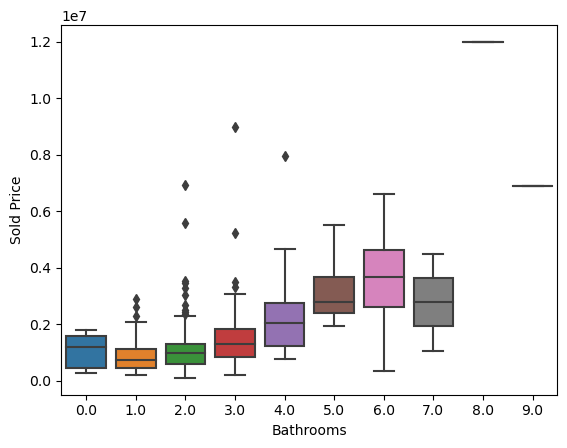

In [28]:
sns.boxplot(x = 'Bathrooms', y = 'Sold Price', data=train_data)



特征-sns.violinplot()
提琴形图和箱形图的区别是，提琴形图聚焦于平滑后的整体分布，而箱形图显示了单独样本的特定统计数据。

使用 violinplot() 方法绘制提琴形图。下图左侧是箱形图，右侧是提琴形图。

<Axes: xlabel='Bathrooms', ylabel='Sold Price'>

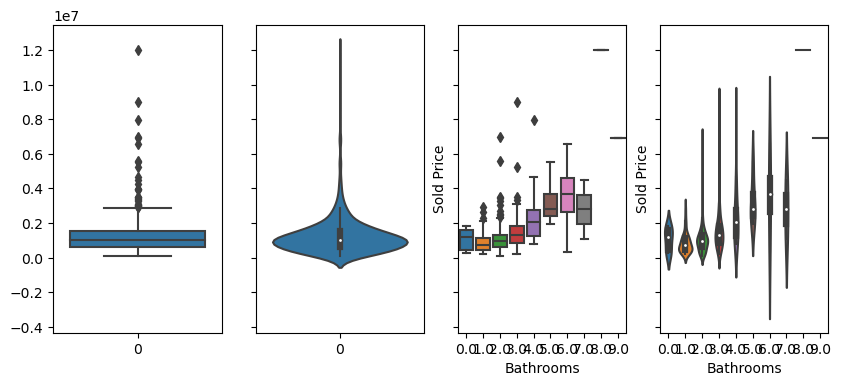

In [29]:
_, axes= plt.subplots( 1, 4, sharey=True, figsize=(10,4))
sns.boxplot(data = train_data['Sold Price'], ax = axes[0])
sns.violinplot(data = train_data['Sold Price'], ax= axes[1])
sns.boxplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax = axes[2])
sns.violinplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax= axes[3])


<Axes: xlabel='Bathrooms', ylabel='Sold Price'>

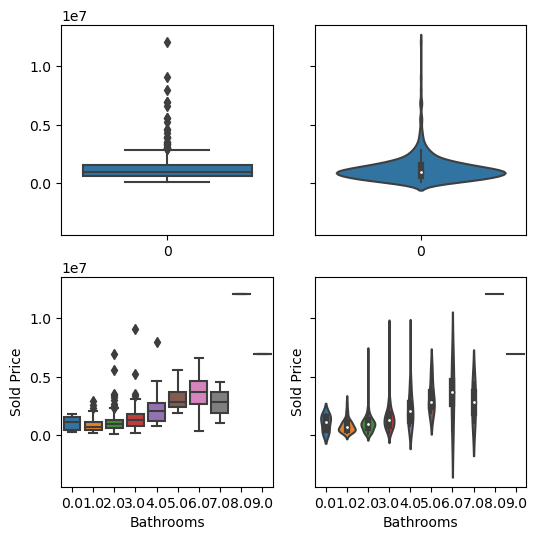

In [30]:
_, axes= plt.subplots( 2, 2,sharey = True, figsize=(6,6))
sns.boxplot(data = train_data['Sold Price'], ax = axes[0,0])
sns.violinplot(data = train_data['Sold Price'], ax= axes[0,1])
sns.boxplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax = axes[1,0])
sns.violinplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax= axes[1,1])


4.2 数字特征分析

4.2.1 单变量可视化
2.1 直方图@数值特征
直方图依照相等的间隔将值分组为柱，它的形状可能包含了数据分布的一些信息，如高斯分布、指数分布等。当分布总体呈现规律性，但有个别异常值时，你可以通过直方图辨认出来。当你使用的机器学习方法预设了某一特定分布类型（通常是高斯分布）时，知道特征值的分布是非常重要的。


4.2.2 多变量可视化

4.2.2.1 相关性分析
变量之间存在多重共线性的情况下会影响模型的精度，这里用相关矩阵corr()和热力图heatmap()可以直观地观察变量之间的相关关系，进而判断是否要对自变量进行删除，或者降维的操作

相关矩阵可揭示数据集中的数值变量的相关性。这一信息很重要，因为有一些机器学习算法（比如，线性回归和逻辑回归）不能很好地处理高度相关的输入变量。

首先，我们使用 DataFrame 的  corr() 方法计算出每对特征间的相关性。接着，我们将所得的相关矩阵（correlation matrix）传给 seaborn 的  heatmap()方法，该方法根据提供的数值，渲染出一个基于色彩编码的矩阵。

In [31]:
#numeric_features.append('class')
numeric_features

['Id',
 'Sold Price',
 'Year built',
 'Lot',
 'Bathrooms',
 'Full bathrooms',
 'Total interior livable area',
 'Total spaces',
 'Garage spaces',
 'Elementary School Score',
 'Elementary School Distance',
 'Middle School Score',
 'Middle School Distance',
 'High School Score',
 'High School Distance',
 'Tax assessed value',
 'Annual tax amount',
 'Listed Price',
 'Last Sold Price',
 'Zip']

corr()是相关矩阵，是DataFrame内置函数，不用另外调包也能生成；

corr()括号里面没有填参数时默认是皮尔逊相关系数，corr(method = 'pearson')；
corr(method = 'spearman')，斯皮尔曼等级相关系数，用来分析非正态分布的数据；
corr(method = 'kendall')，秩相关系数，用来分析两定序变量相关关系；

In [32]:

class_numeric_feature = train_data[numeric_features]
correlation = class_numeric_feature.corr()      #查看各数字特征与价格之间相关性
correlation


,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
Id,1.000000,0.000333,0.026485,0.009471,-0.044245,-0.039855,0.013814,0.030316,0.016370,-0.035269,0.118621,0.084571,0.036666,0.021325,0.145187,0.029496,0.023010,0.007576,0.077293,0.083953
Sold Price,0.000333,1.000000,-0.023517,-0.003552,0.507443,0.546990,0.620870,0.115624,0.115429,0.294370,-0.127053,0.207089,-0.042749,0.259795,-0.133867,0.841349,0.840453,0.974193,0.897197,-0.009531
Year built,0.026485,-0.023517,1.000000,0.143593,0.085875,0.073144,0.045043,0.039189,0.037286,-0.015363,0.065508,0.061489,0.103645,0.087541,0.070217,0.055342,0.055694,-0.031106,-0.154189,0.014935
Lot,0.009471,-0.003552,0.143593,1.000000,0.231353,0.175956,0.302076,0.242299,0.190816,-0.026730,0.285994,0.053106,0.166283,0.033092,0.363036,0.003617,-0.005021,0.018249,0.233693,0.001925
Bathrooms,-0.044245,0.507443,0.085875,0.231353,1.000000,0.868823,0.707004,0.220072,0.221408,0.135057,0.115138,0.098314,0.153274,0.104813,0.091793,0.498875,0.489622,0.502124,0.502263,0.029976
Full bathrooms,-0.039855,0.546990,0.073144,0.175956,0.868823,1.000000,0.719973,0.268415,0.278644,0.156034,0.052699,0.137472,0.126110,0.108218,0.066053,0.488600,0.482601,0.566007,0.512067,0.049675
Total interior livable area,0.013814,0.620870,0.045043,0.302076,0.707004,0.719973,1.000000,0.353730,0.348345,0.097642,0.111747,0.118975,0.151861,0.111353,0.114928,0.554187,0.540777,0.632701,0.617700,0.015600
Total spaces,0.030316,0.115624,0.039189,0.242299,0.220072,0.268415,0.353730,1.000000,0.976163,-0.017315,0.106074,0.085606,0.024222,0.019491,0.090762,0.154706,0.164317,0.135011,0.201500,0.044982
Garage spaces,0.016370,0.115429,0.037286,0.190816,0.221408,0.278644,0.348345,0.976163,1.000000,-0.019771,0.102032,0.089275,0.025910,0.031397,0.073744,0.146611,0.154822,0.134180,0.188359,0.081820
Elementary School Score,-0.035269,0.294370,-0.015363,-0.026730,0.135057,0.156034,0.097642,-0.017315,-0.019771,1.000000,-0.101917,0.490333,-0.078074,0.461044,-0.143940,0.245354,0.260976,0.286088,0.281628,0.000936


In [33]:
print(correlation['Sold Price'].sort_values(ascending = False),'\n') 

Sold Price                     1.000000
Listed Price                   0.974193
Last Sold Price                0.897197
Tax assessed value             0.841349
Annual tax amount              0.840453
Total interior livable area    0.620870
Full bathrooms                 0.546990
Bathrooms                      0.507443
Elementary School Score        0.294370
High School Score              0.259795
Middle School Score            0.207089
Total spaces                   0.115624
Garage spaces                  0.115429
Id                             0.000333
Lot                           -0.003552
Zip                           -0.009531
Year built                    -0.023517
Middle School Distance        -0.042749
Elementary School Distance    -0.127053
High School Distance          -0.133867
Name: Sold Price, dtype: float64 



如果发现字段太多，要找到强相关关系的字段并不是很容易。需要再配合热力图使用。

<Axes: title={'center': 'Correlation of Numeric Features with hours-per-week'}>

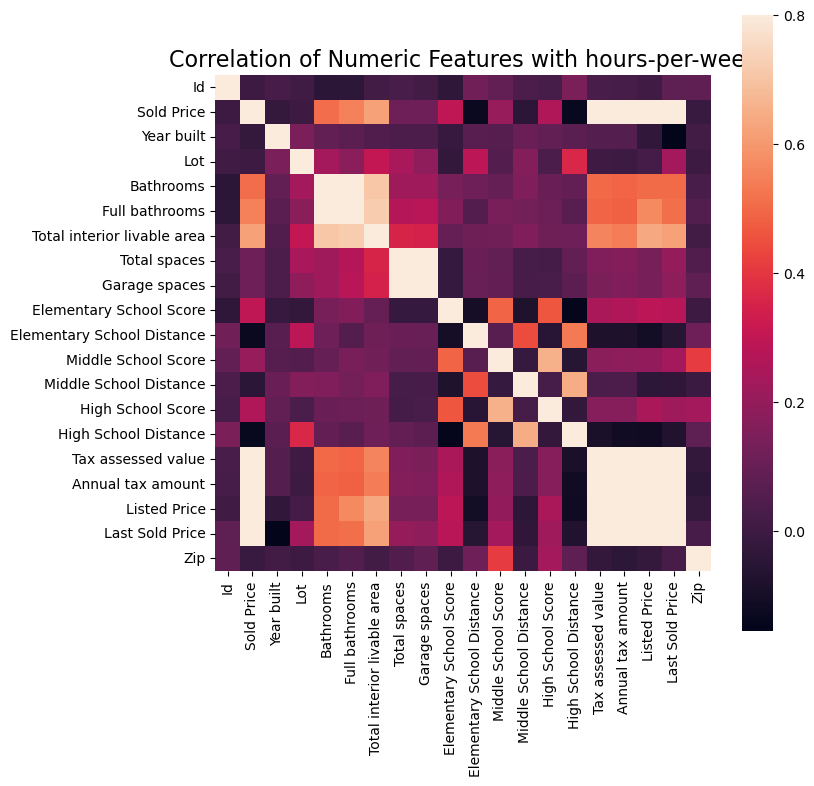

In [34]:
f , ax = plt.subplots(figsize = (8, 8))
plt.title('Correlation of Numeric Features with hours-per-week',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

 转为热力图就非常直观啦：从右侧可以了解越接近白色的部分代表相关系数越高，有几个字段是具有强相关性的，需要进行删除或者降维操作。

4.2.2查看数字特征的偏度和峰值

In [35]:
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[col].kurt())  
         )

Id              Skewness: 00.11     Kurtosis: -01.11
Sold Price      Skewness: 03.90     Kurtosis: 024.29
Year built      Skewness: -14.42     Kurtosis: 218.50
Lot             Skewness: 09.73     Kurtosis: 104.50
Bathrooms       Skewness: 01.88     Kurtosis: 007.83
Full bathrooms  Skewness: 02.11     Kurtosis: 009.04
Total interior livable area Skewness: 05.86     Kurtosis: 066.18
Total spaces    Skewness: 02.01     Kurtosis: 007.52
Garage spaces   Skewness: 02.07     Kurtosis: 008.42
Elementary School Score Skewness: -0.06     Kurtosis: -00.93
Elementary School Distance Skewness: 03.52     Kurtosis: 014.22
Middle School Score Skewness: -0.06     Kurtosis: -00.83
Middle School Distance Skewness: 03.31     Kurtosis: 013.61
High School Score Skewness: -0.45     Kurtosis: -00.34
High School Distance Skewness: 04.22     Kurtosis: 024.27
Tax assessed value Skewness: 04.10     Kurtosis: 024.67
Annual tax amount Skewness: 03.91     Kurtosis: 023.03
Listed Price    Skewness: 04.77     Kurtosis

3.2.3数字特征的分布可视化

In [36]:
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,10391,327 Castile Way,1715000.0,Stunningly Beautiful Inside & Out perfectly de...,SingleFamily,1999.0,Forced Air,No Air Conditioning,Attached,5662.8,...,Attached,1611000.0,17878.0,2020-04-05,1680000.0,2005-12-20,1375000.0,South San Francisco,94080,CA
1,38445,336 Market St,1856500.0,"Rare corner-lot, 2-story Single Family at Sant...",SingleFamily,2017.0,Central Forced Air,Central AC,"Garage, Garage - Attached, Covered",2692.0,...,"Garage, Garage - Attached, Covered",1849827.0,22949.0,2020-10-20,1799000.0,2017-10-20,1778000.0,Los Gatos,95032,CA
2,27058,1439 Bouret Dr,1100000.0,You must see this lovingly renovated home on a...,SingleFamily,1963.0,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",6599.0,...,"Garage, Garage - Attached, Covered",134573.0,2804.0,2020-08-28,1039900.0,NaN,NaN,San Jose,95118,CA
3,21222,1836 Circulo Canada UNIT 12,150000.0,Beautiful property located nestled in between ...,SingleFamily,2007.0,Heat Pump,Central,"Garage, Garage - Attached, Covered",11325.6,...,"Garage, Garage - Attached, Covered",84112.0,896.0,2020-07-01,150000.0,2012-02-24,80000.0,Rio Rico,85648,AZ
4,24578,887 College Dr,1182000.0,"887 College Dr, San Jose, CA 95128 is a single...",SingleFamily,1955.0,Central Forced Air,"Ceiling Fan, Central AC","Garage, Garage - Attached, Covered",6080.0,...,"Garage, Garage - Attached, Covered",731883.0,10210.0,2020-07-20,1188888.0,2013-03-05,650000.0,Santa Clara,95053,CA


In [37]:
f = pd.melt(train_data, value_vars=numeric_features)
f

,variable,value
0,Id,10391.0
1,Id,38445.0
2,Id,27058.0
3,Id,21222.0
4,Id,24578.0
...,...,...
9995,Zip,95225.0
9996,Zip,95148.0
9997,Zip,95125.0
9998,Zip,95003.0


d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
d:\CondaPyEnvs\seaborn\lib\site-pa

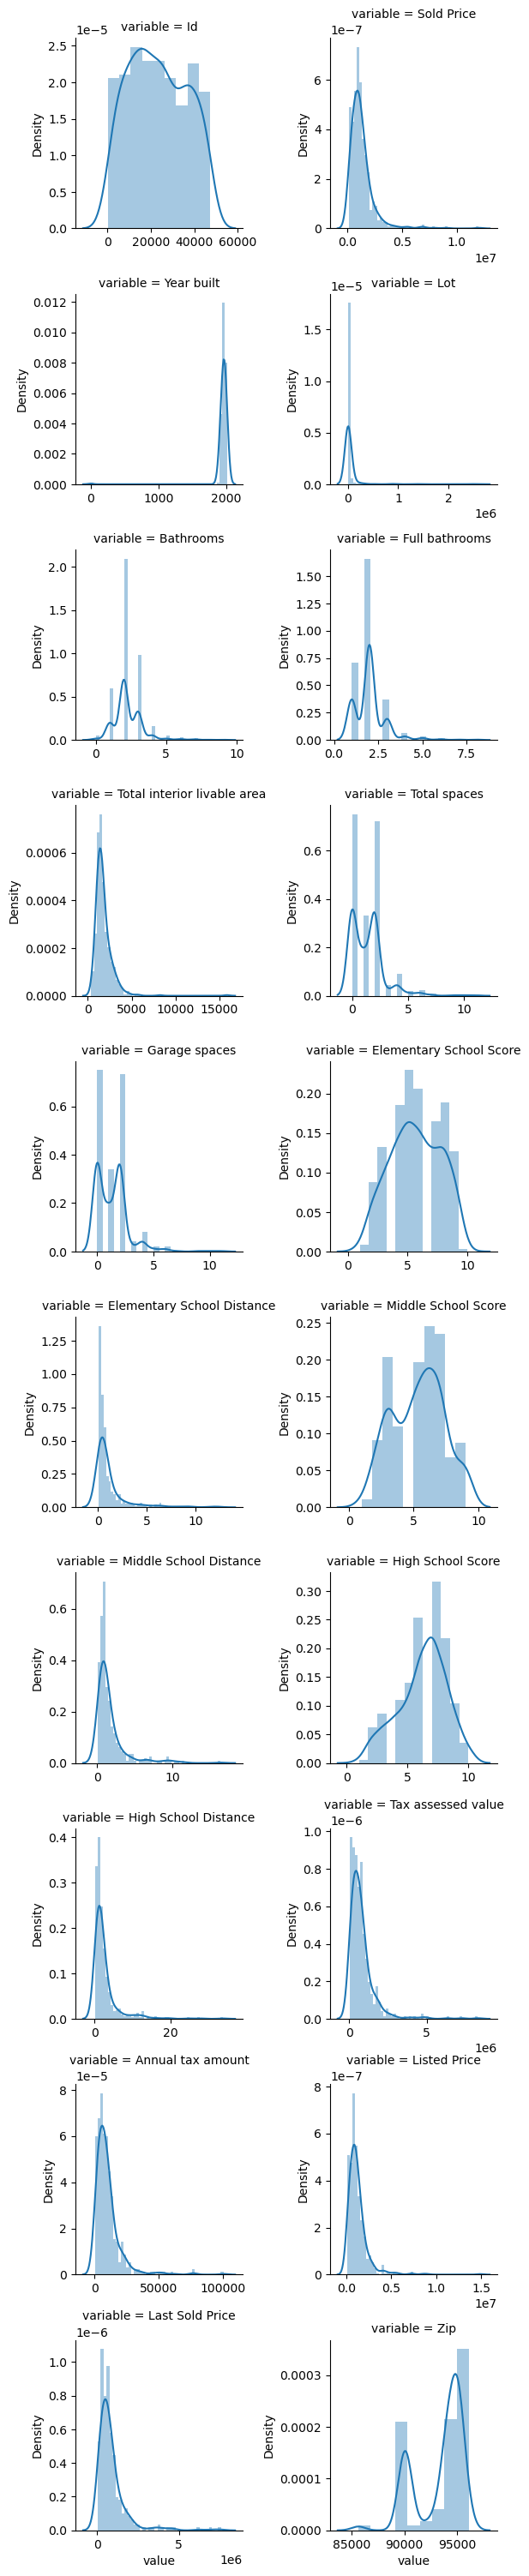

In [38]:
f = pd.melt(train_data, value_vars=numeric_features)  # 转换为长数据
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

4.2.4数字特征相互之间的关系可视化

In [39]:
train_data[numeric_features]

,Id,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,10391,1715000.0,1999.0,5662.8,3.0,NaN,2750.0,3.0,3.0,6.0,0.3,5.0,1.5,5.0,0.5,1611000.0,17878.0,1680000.0,1375000.0,94080
1,38445,1856500.0,2017.0,2692.0,3.0,3.0,2165.0,2.0,2.0,6.0,0.2,7.0,1.4,7.0,1.5,1849827.0,22949.0,1799000.0,1778000.0,95032
2,27058,1100000.0,1963.0,6599.0,2.0,2.0,1188.0,2.0,2.0,4.0,0.4,5.0,0.7,7.0,0.6,134573.0,2804.0,1039900.0,NaN,95118
3,21222,150000.0,2007.0,11325.6,2.0,2.0,1133.0,2.0,2.0,5.0,4.2,6.0,6.5,5.0,4.4,84112.0,896.0,150000.0,80000.0,85648
4,24578,1182000.0,1955.0,6080.0,2.0,2.0,1556.0,2.0,2.0,4.0,0.4,4.0,1.5,5.0,0.7,731883.0,10210.0,1188888.0,650000.0,95053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20271,1048000.0,1977.0,2613600.0,7.0,5.0,5798.0,7.0,7.0,4.0,9.4,NaN,NaN,6.0,10.4,411744.0,4605.0,1600000.0,NaN,95225
496,1678,1000000.0,1971.0,6255.0,2.0,2.0,1616.0,2.0,2.0,5.0,0.2,7.0,0.9,9.0,1.2,601910.0,9492.0,950000.0,463000.0,95148
497,9214,101000.0,1954.0,10030.0,2.0,NaN,1651.0,2.0,2.0,5.0,0.3,5.0,0.8,6.0,0.8,1417956.0,17819.0,1049000.0,249000.0,95125
498,13818,649999.0,1983.0,871.0,2.0,1.0,1233.0,0.0,0.0,4.0,0.5,NaN,NaN,7.0,3.4,611665.0,7482.0,649999.0,489500.0,95003


3.1.2 散点图-plt.scatter()或sns.jointplot()
散点图（scatter plot）将两个数值变量的值显示为二维空间中的笛卡尔坐标（Cartesian coordinate）。seaborn 库的  jointplot() 方法在绘制散点图的同时会绘制两张直方图，某些情形下它们可能会更有用。



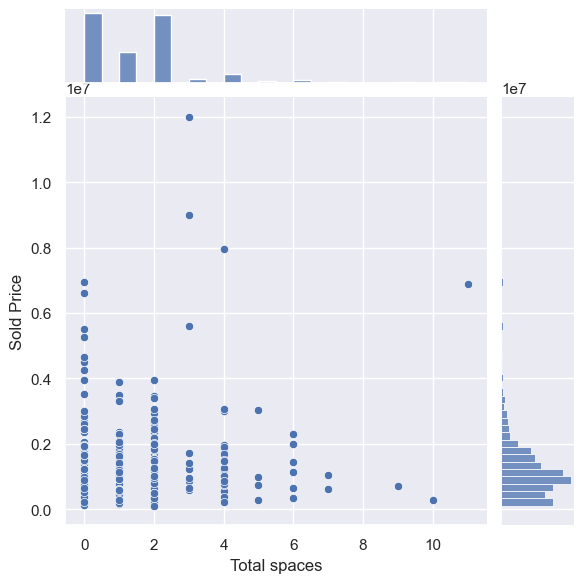

In [44]:
sns.jointplot(x='Total spaces', y='Sold Price', data=train_data, kind='scatter')

d:\CondaPyEnvs\seaborn\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


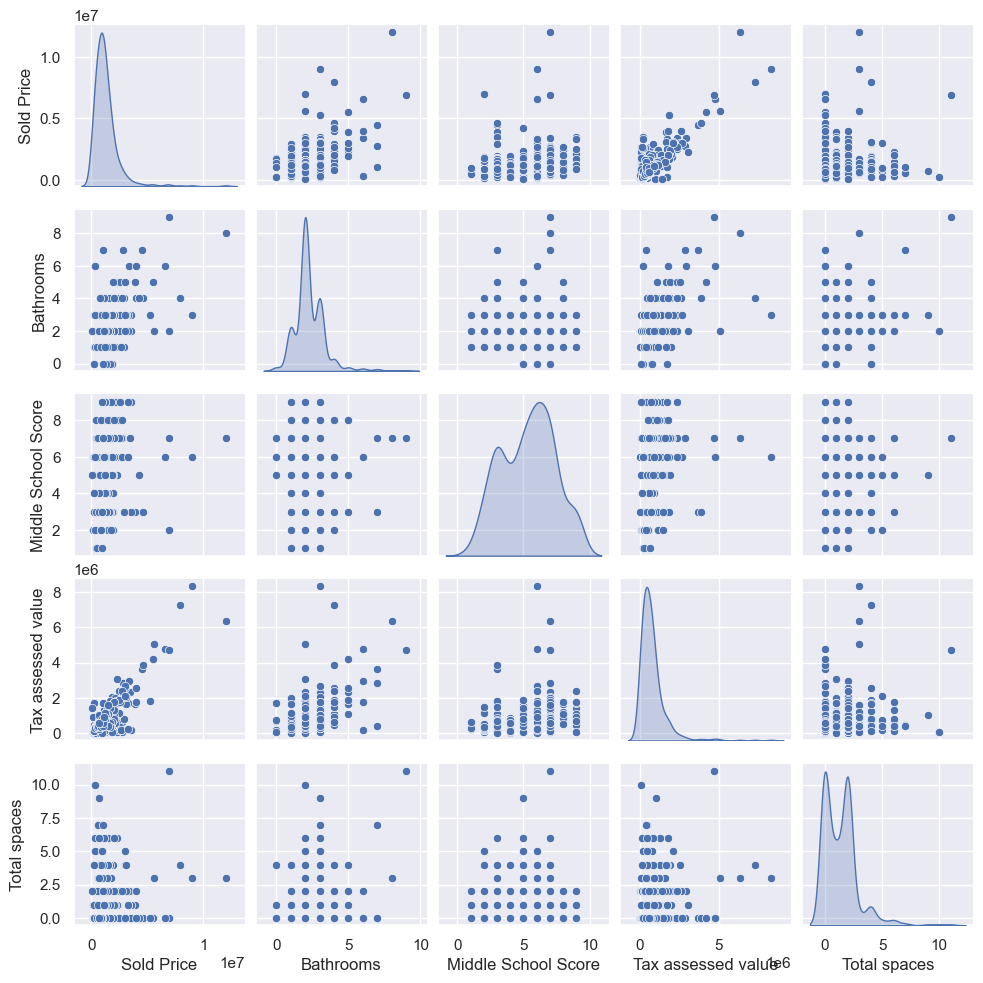

In [41]:
sns.set()
columns = ['Sold Price','Bathrooms','Middle School Score','Tax assessed value','Total spaces']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

4.2.5多变量互相回归关系可视化

_, axes= plt.subplots( 1, 4, sharey=True, figsize=(10,4))
sns.boxplot(data = train_data['Sold Price'], ax = axes[0])
sns.violinplot(data = train_data['Sold Price'], ax= axes[1])
sns.boxplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax = axes[2])
sns.violinplot(x = 'Bathrooms', y = 'Sold Price', data=train_data, ax= axes[3])

<Axes: xlabel='Total spaces', ylabel='Sold Price'>

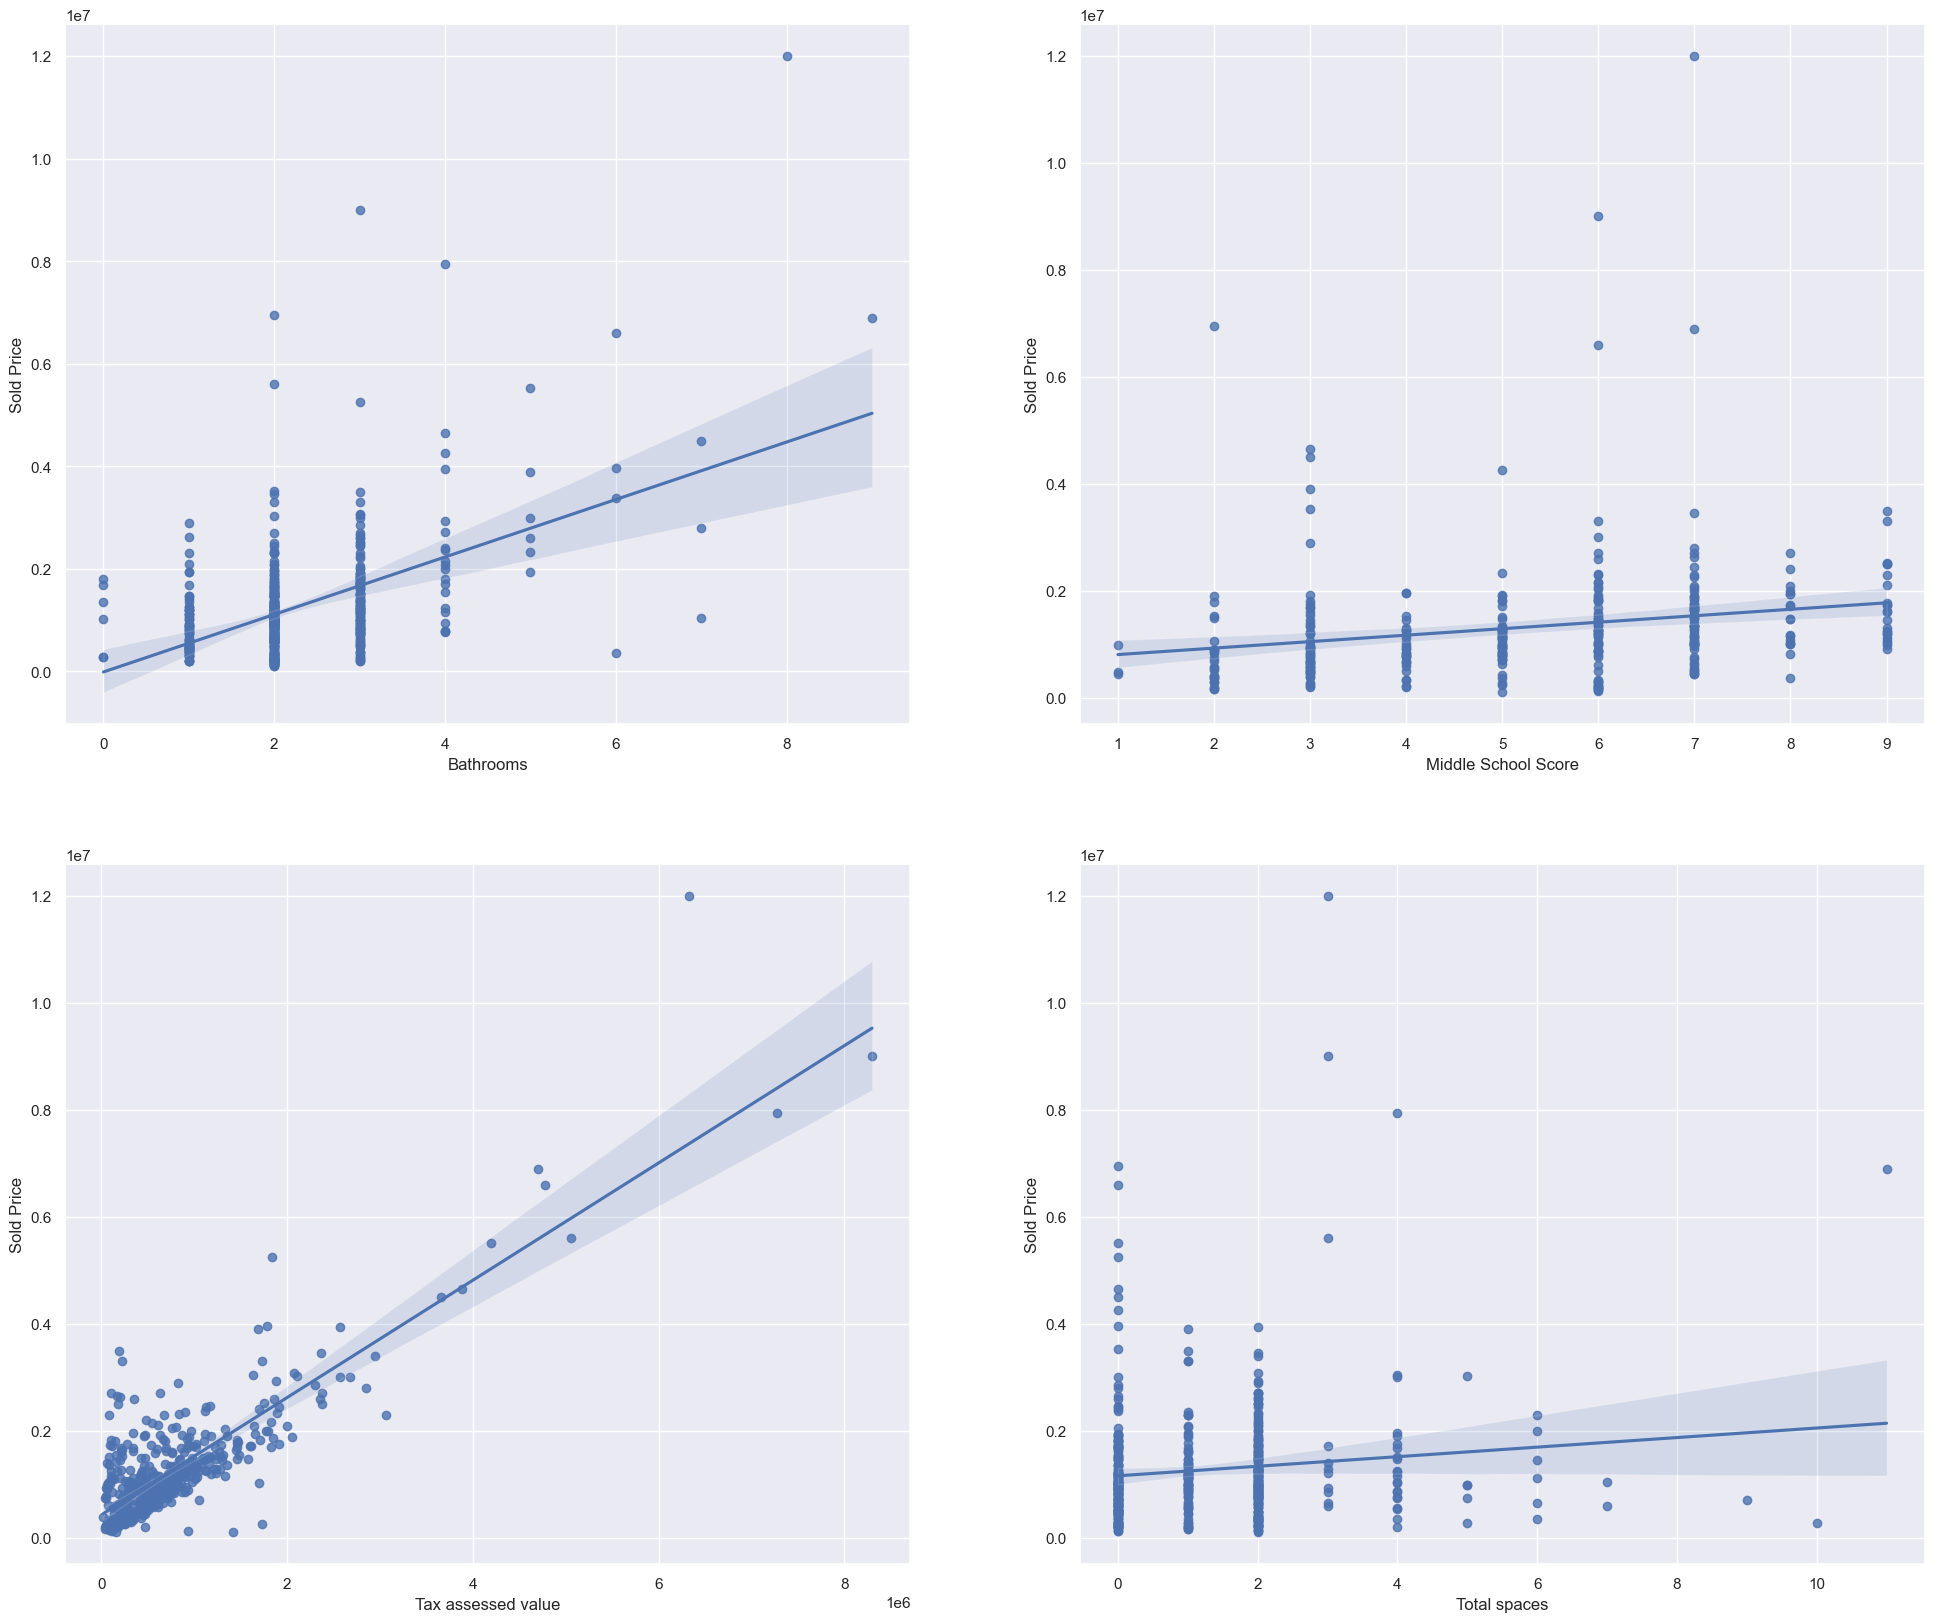

In [42]:

#fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14', 'v_13']  #选取相关性强度前十的变量
#v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='Bathrooms',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[0,0])
sns.regplot(x='Middle School Score',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[0,1])
sns.regplot(x='Tax assessed value',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[1,0])
sns.regplot(x='Total spaces',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=axes[1,1])



<Axes: xlabel='Total spaces', ylabel='Sold Price'>

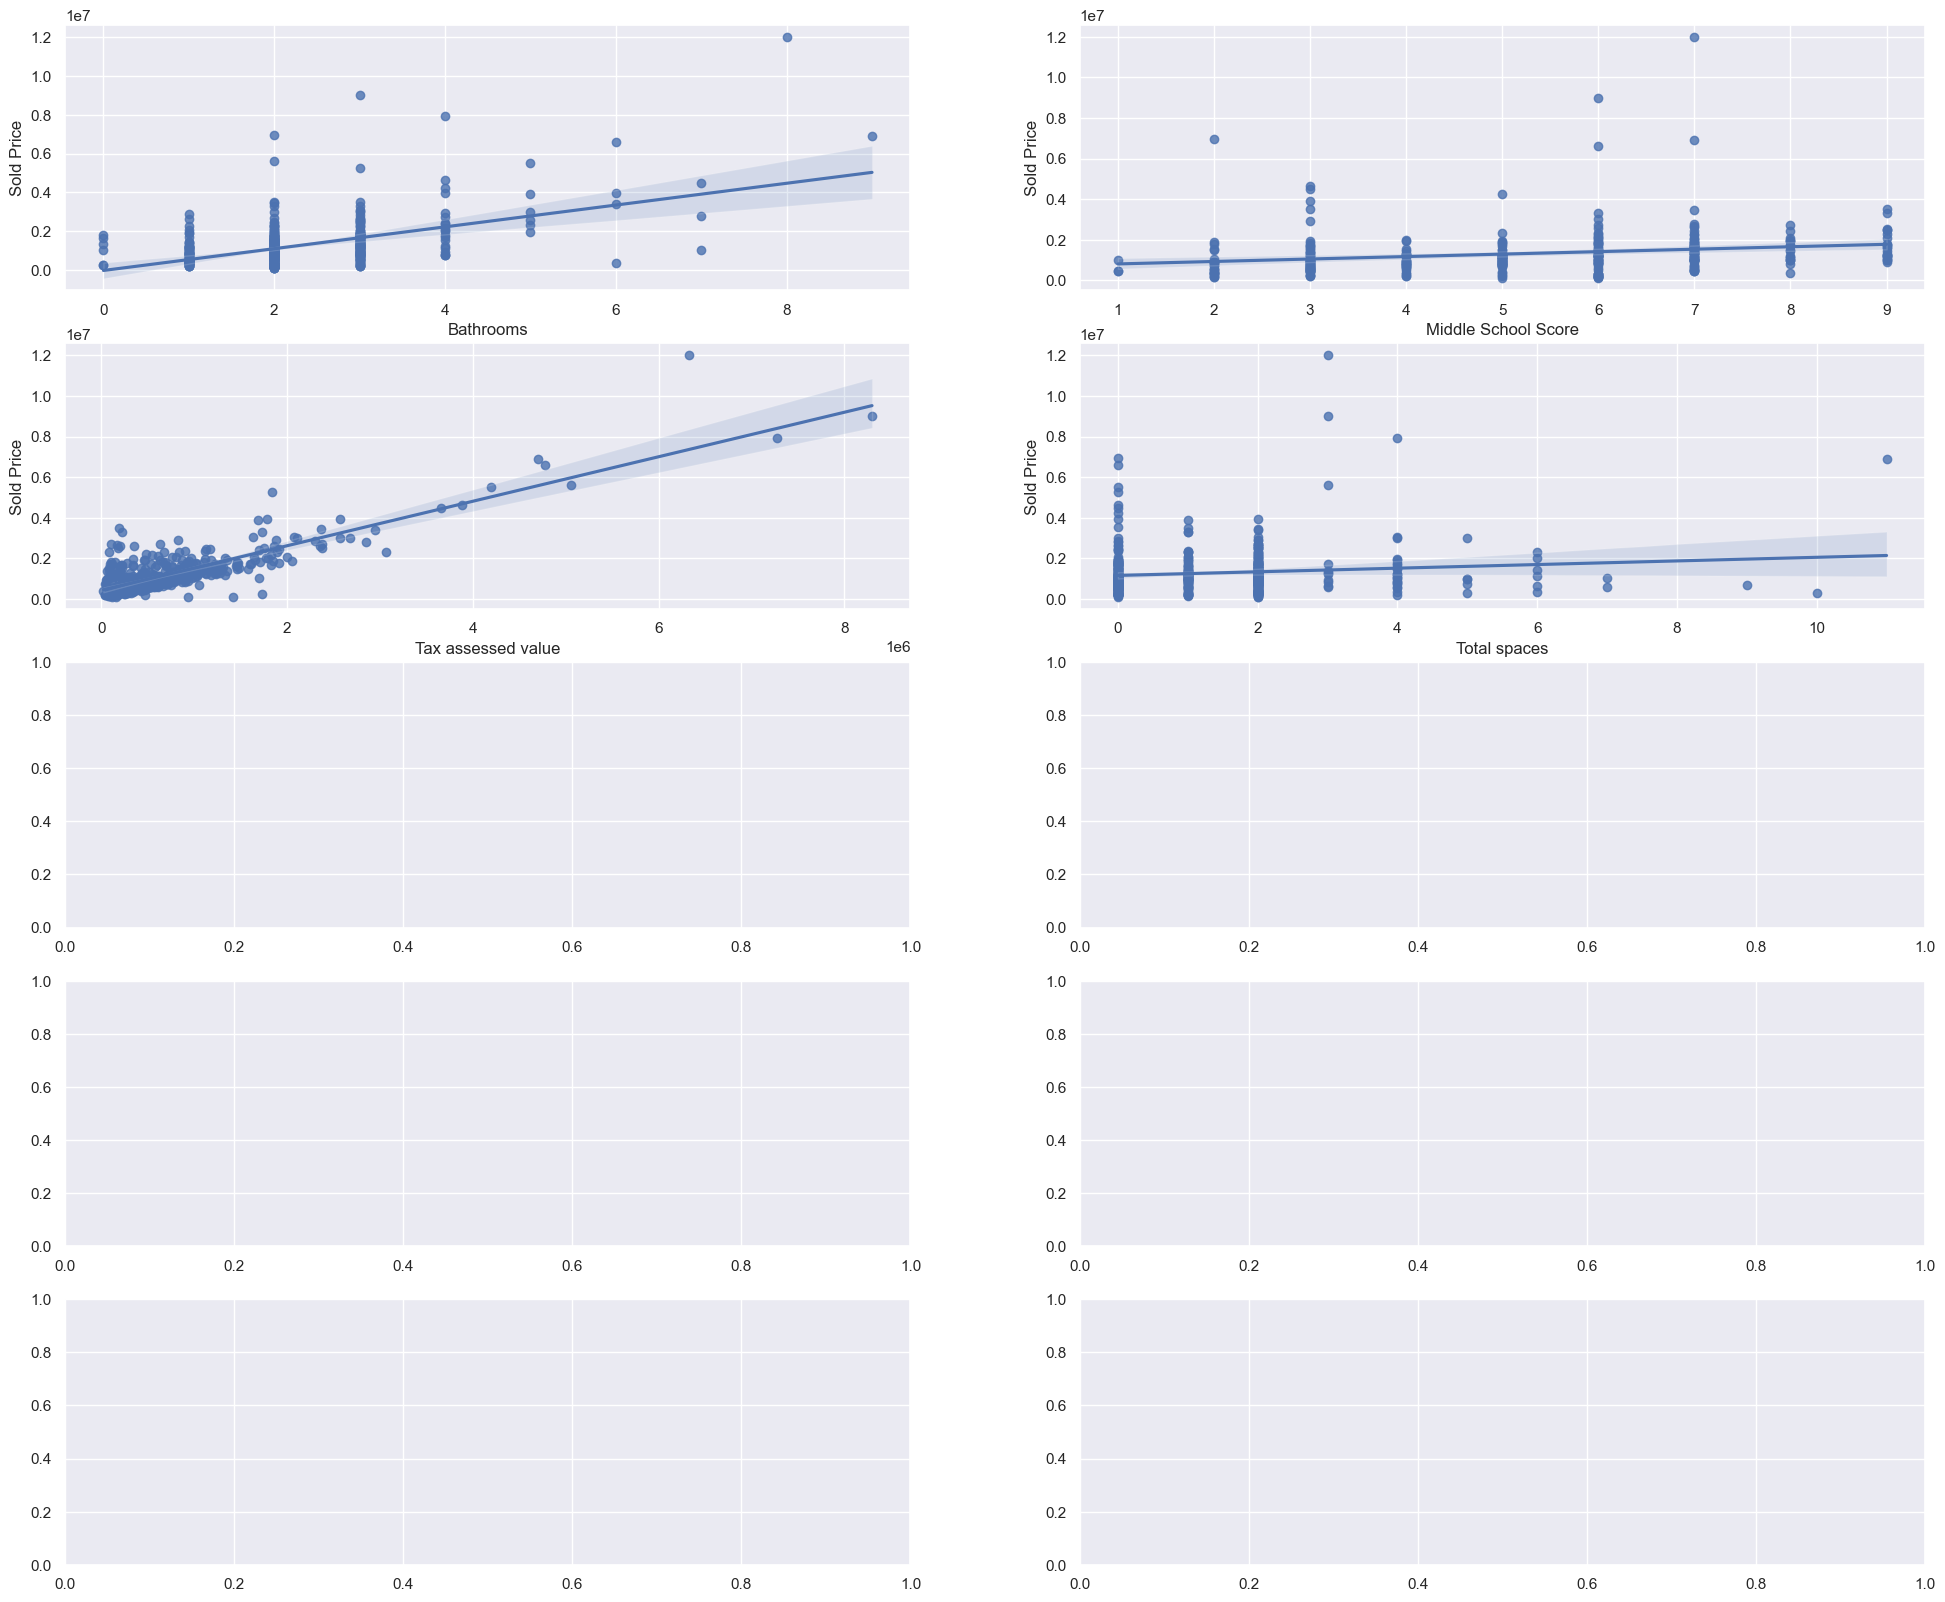

In [43]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))

sns.regplot(x='Bathrooms',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax1)
sns.regplot(x='Middle School Score',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax2)
sns.regplot(x='Tax assessed value',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax3)
sns.regplot(x='Total spaces',y = 'Sold Price', data = train_data,scatter= True, fit_reg=True, ax=ax4)